In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
!pip install webcolors

In [188]:
import cv2
import os
import numpy as np
from collections import Counter
import webcolors
import matplotlib.pyplot as plt
import matplotlib
from moviepy.editor import *
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten,vq,kmeans
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

In [189]:
def img_aspect_ratio(path):
    img = cv2.imread(path)
    height, width , color = img.shape
    #print(height, width)
    print("Image Aspect Ratio")

    def gcd(a, b):
        """The GCD (greatest common divisor) is the highest number that evenly divides both width and height."""
        return a if b == 0 else gcd(b, a % b)

    r = gcd(width, height)
    x = int(width / r)
    y = int(height / r)

    return f"{x}:{y}"

In [190]:
def vid_aspect_ratio(path):
  vcap = cv2.VideoCapture(path)
  width  = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
  height = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  print(width,height)

  #print(height, width)

  def gcd(a, b):
      """The GCD (greatest common divisor) is the highest number that evenly divides both width and height."""
      return a if b == 0 else gcd(b, a % b)

  r = gcd(width, height)
  x = int(width / r)
  y = int(height / r)

  return f"{x}:{y}"

In [191]:
def vid_length(path):
  clip = VideoFileClip(path)
  duration = clip.duration
  return duration

In [192]:
'''
def closest_colour(requested_colour):
  
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
  #  requested_colour = list(requested_colour)
  #  requested_colour = [i * 10000 for i in requested_colour]
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
   #return actual_name, closest_name

    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

requested_colour = (0.48287589689402594, 0.47814125711992395, 0.5068779192300309)
#requested_colour = [i * 10000 for i in requested_colour]
#actual_name, closest_name = get_colour_name(requested_colour)

#print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

get_colour_name(requested_colour)
'''

'\ndef closest_colour(requested_colour):\n  \n    min_colours = {}\n    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():\n        r_c, g_c, b_c = webcolors.hex_to_rgb(key)\n        rd = (r_c - requested_colour[0]) ** 2\n        gd = (g_c - requested_colour[1]) ** 2\n        bd = (b_c - requested_colour[2]) ** 2\n        min_colours[(rd + gd + bd)] = name\n    return min_colours[min(min_colours.keys())]\n\ndef get_colour_name(requested_colour):\n  #  requested_colour = list(requested_colour)\n  #  requested_colour = [i * 10000 for i in requested_colour]\n    try:\n        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)\n    except ValueError:\n        closest_name = closest_colour(requested_colour)\n        actual_name = None\n   #return actual_name, closest_name\n\n    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)\n\nrequested_colour = (0.48287589689402594, 0.47814125711992395, 0.5068779192300309)\n#requested_colour = [i * 1

In [193]:
def prominent_colors(path):
  image = img.imread(path,0)
  
  r = []
  g = []
  b = []
  for row in image:
      for temp_r, temp_g, temp_b in row:
          r.append(temp_r)
          g.append(temp_g)
          b.append(temp_b)
    
  df = pd.DataFrame({'red' : r,
                            'green' : g,
                            'blue' : b})
    
  df['scaled_color_red'] = whiten(df['red'])
  df['scaled_color_blue'] = whiten(df['blue'])
  df['scaled_color_green'] = whiten(df['green'])

  df1 = df[['scaled_color_red','scaled_color_blue','scaled_color_green']]
    
  cluster_centers, _ = kmeans(df[['scaled_color_red',
                                      'scaled_color_blue',
                                      'scaled_color_green']], 3)
 # print(type(cluster_centers))
 # print(cluster_centers.shape)
 # print(cluster_centers)
 # print(_)
  

  # assign each sample to a cluster
  clx,_ = vq(df1,cluster_centers)
  c = Counter(clx)
  print("Colour % in Image")
  print([(i, c[i] / len(clx) * 100.0) for i in c])
  print()
  #print([(i, c[i] / len(clx) * 100.0) for i, count in c.most_common()])
    
  dominant_colors = []
    
  red_std, green_std, blue_std = df[['red',
                                            'green',
                                            'blue']].std()
  i = 0  
  print("RGB & HEX Prominent Colors found in Image:")
  for cluster_center in cluster_centers:
      red_scaled, green_scaled, blue_scaled = cluster_center
      dominant_colors.append((
          red_scaled * red_std / 255,
          green_scaled * green_std / 255,
          blue_scaled * blue_std / 255
          
      ))
      try:
        hex_color = matplotlib.colors.to_hex(dominant_colors[i])
        print(dominant_colors[i])
    #    requested_colour = dominant_colors[i]
    #    print("Request color is :",requested_colour)
    #    get_colour_name(requested_colour)
        print(hex_color)
        #named_color = rgb_to_name(hex_color)
        #print(named_color)
        i += 1
      except:
        pass
  
  ####################################################################
  """
  sse = {}
  for k in range(1, 3):
      kmeans1 = KMeans(n_clusters=k).fit(cluster_centers)
    # data["clusters"] = kmeans.labels_
      #print(data["clusters"])
      sse[k] = kmeans1.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()
  """
##################################################################
    
  plt.imshow([dominant_colors])
  plt.show()
  

In [194]:
def prominent_colors_video(image):
  r = []
  g = []
  b = []
  for row in image:
    for temp_r, temp_g, temp_b in row:
      r.append(temp_r)
      g.append(temp_g)
      b.append(temp_b)

  df = pd.DataFrame({'red' : r,
              'green' : g,
              'blue' : b})

  df['scaled_color_red'] = whiten(df['red'])
  df['scaled_color_blue'] = whiten(df['blue'])
  df['scaled_color_green'] = whiten(df['green'])

  df1 = df[['scaled_color_red','scaled_color_blue','scaled_color_green']]

  cluster_centers, _ = kmeans(df[['scaled_color_red',
                    'scaled_color_blue',
                    'scaled_color_green']], 4)
  
  # assign each sample to a cluster
  clx,_ = vq(df1,cluster_centers)
  c = Counter(clx)
  print("Colour % in Image")
  print([(i, c[i] / len(clx) * 100.0) for i in c])
  print()
  #print([(i, c[i] / len(clx) * 100.0) for i, count in c.most_common()])

  #################################################################
  '''
  c_img = image.copy()
  c_img = np.reshape(c_img, (-1,3))

  print (c_img.shape)
  for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(c_img)
    label = kmeans.labels_
    sil_coeff = silhouette_score(c_img, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    '''
  ###############################################################
  i = 0
  dominant_colors = []

  red_std, green_std, blue_std = df[['red',
                      'green',
                      'blue']].std()

  for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
    dominant_colors.append((
      red_scaled * red_std / 255,
      green_scaled * green_std / 255,
      blue_scaled * blue_std / 255
    ))
    try:
      hex_color = matplotlib.colors.to_hex(dominant_colors[i])
      print(dominant_colors[i])
      print(hex_color)
      i += 1
    except:
      pass

  plt.imshow([dominant_colors])
  plt.show()

  ##############
  
  sse = {}
  for k in range(1, 4):
      kmeans1 = KMeans(n_clusters=k).fit(cluster_centers)
    # data["clusters"] = kmeans.labels_
      #print(data["clusters"])
      sse[k] = kmeans1.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()
  

    


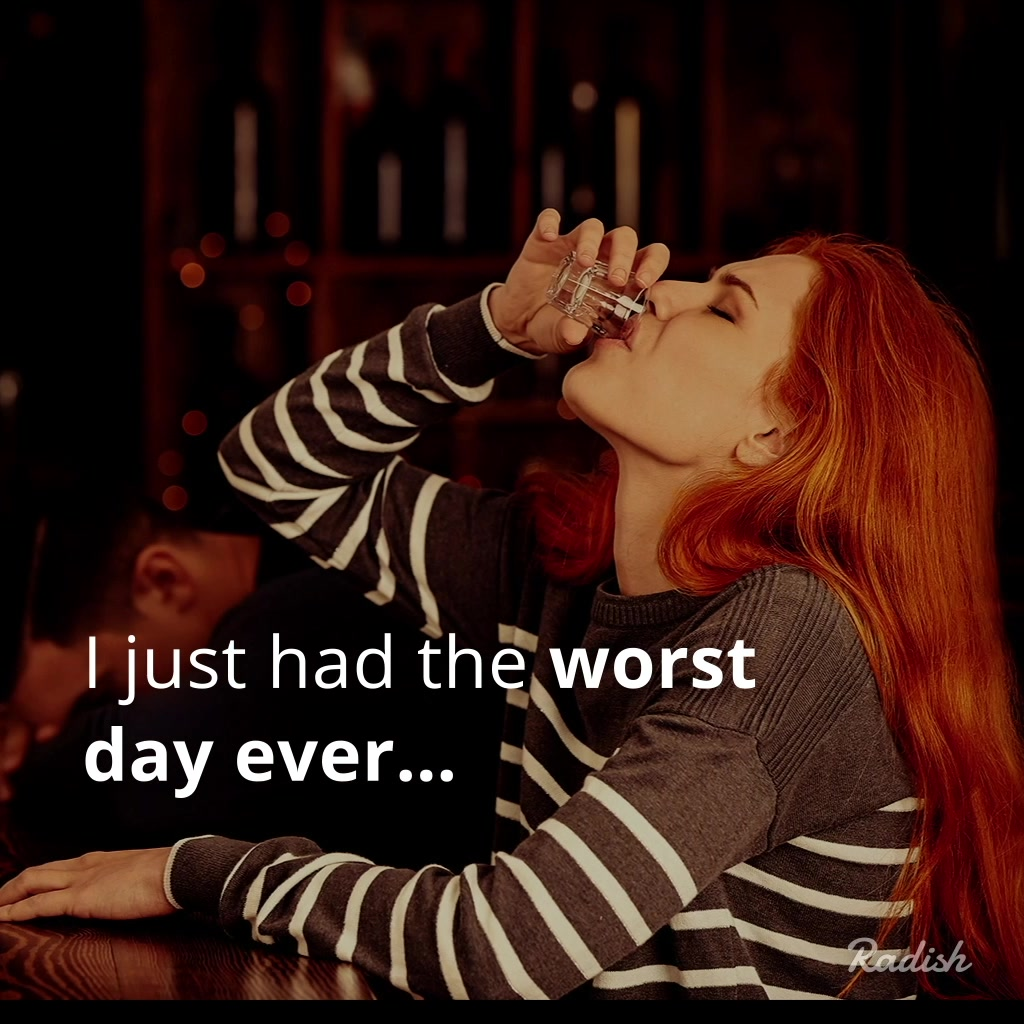


Image Aspect Ratio
1:1

Colour % in Image
[(2, 61.64112091064453), (0, 27.99224853515625), (1, 10.366630554199219)]

RGB & HEX Prominent Colors found in Image:
(0.37231905030887746, 0.0992656230367405, 0.11777604417648889)
#5f191e
(0.7102818633577418, 0.5627843406587577, 0.5075509587861604)
#b59081
(0.05021821436431628, 0.007582583545659932, 0.006133065350570851)
#0d0202


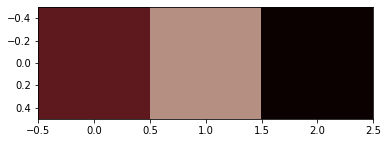

None

***************************************************


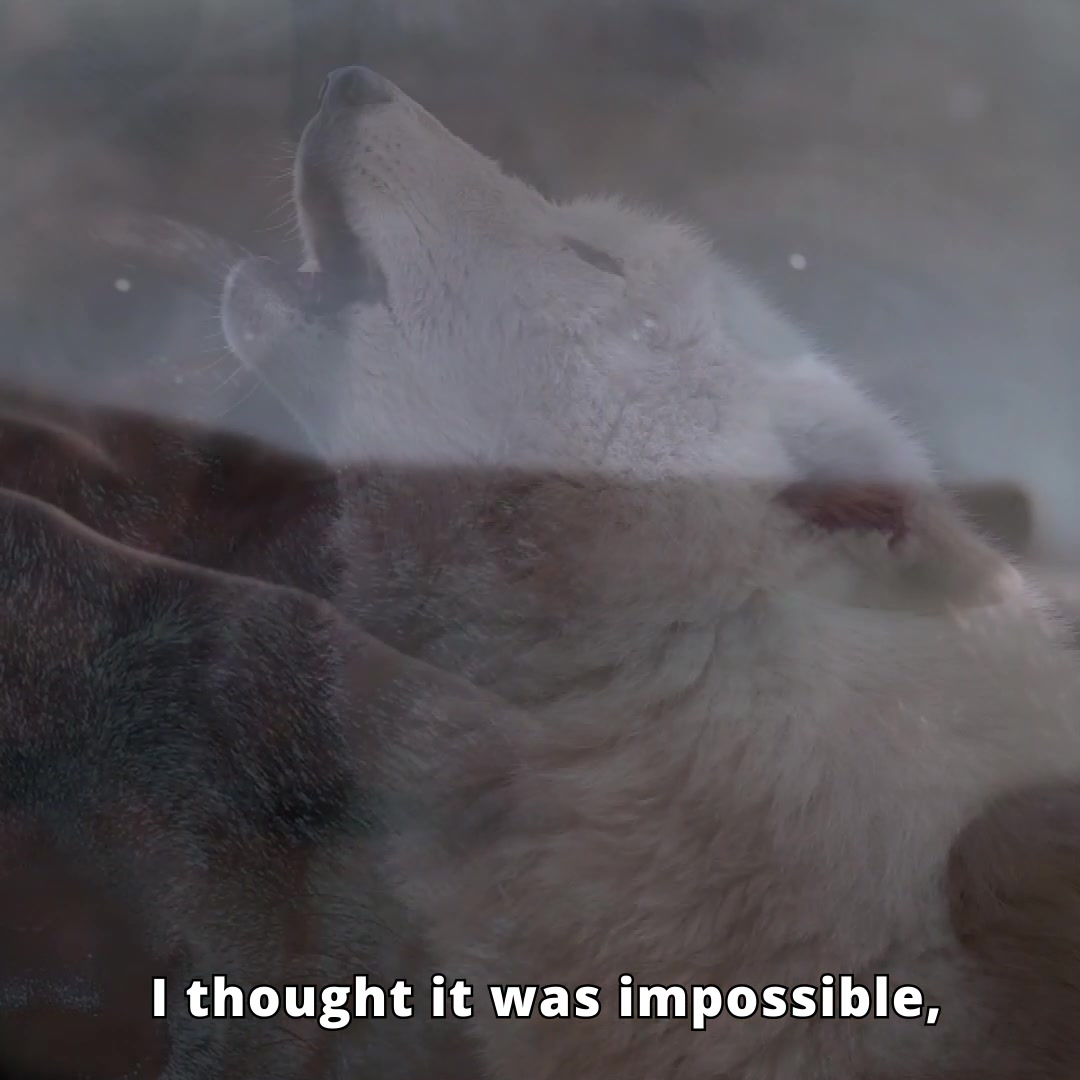


Image Aspect Ratio
1:1

Colour % in Image
[(2, 31.01328875171468), (1, 43.513803155006855), (0, 25.472908093278463)]

RGB & HEX Prominent Colors found in Image:
(0.18464409895915337, 0.16271846471034104, 0.17504982325976146)
#2f292d
(0.33884212901119304, 0.3116603476826055, 0.3381766260352087)
#564f56
(0.4809937842567598, 0.47593992022308274, 0.5046925820353472)
#7b7981


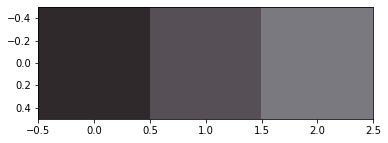

None

***************************************************


In [195]:
from IPython.display import Image,display

All_Images = []
d = "/content/drive/MyDrive/BLKBOX_IMAGE_SIMILARITY_MODEL/test"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        All_Images.append(full_path)
#print(All_Images)

All_Images = All_Images[2:4]
for path in All_Images:
 # display(Image(filename='MyImage.png'))
 # print(path)
  display(Image(filename=str(path),width = 300, height = 300))
  print()
  print(img_aspect_ratio(path))
  print()
  print(prominent_colors(path))
  print()
#  print(prominent_color_scikit(path))
  print('***************************************************')

In [196]:
'''
All_Videos = []
d = "/content/drive/MyDrive/Creative_Insights/test_video"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        All_Videos.append(full_path)
print(All_Videos)

for path in All_Videos:
  print('Video Height Width & Aspect Rastio is :')
  print(vid_aspect_ratio(path))
  print()
  print("The Length of the video is :",vid_length(path),'seconds')
'''  


'\nAll_Videos = []\nd = "/content/drive/MyDrive/Creative_Insights/test_video"\nfor path in os.listdir(d):\n    full_path = os.path.join(d, path)\n    if os.path.isfile(full_path):\n        All_Videos.append(full_path)\nprint(All_Videos)\n\nfor path in All_Videos:\n  print(\'Video Height Width & Aspect Rastio is :\')\n  print(vid_aspect_ratio(path))\n  print()\n  print("The Length of the video is :",vid_length(path),\'seconds\')\n'

Video Height Width & Aspect Rastio is :
1080 1350
4:5

The Length of the video is : 42.82 seconds


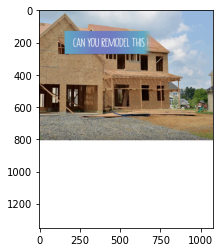

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Colour % in Image
[(3, 20.432304526748972), (2, 42.84951989026063), (0, 28.39218106995885), (1, 8.32599451303155)]

(0.4077757562604659, 0.6469934899462788, 0.4716576233293547)
#68a578
(0.09064942395314757, 0.2359780509991823, 0.14119373234047242)
#173c24


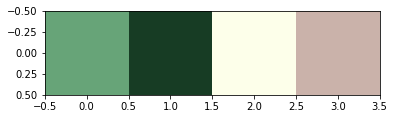

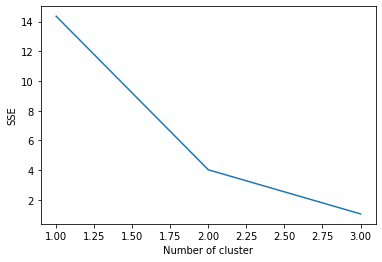

$$$$$$$$$$$$$$$$$$$$$$$


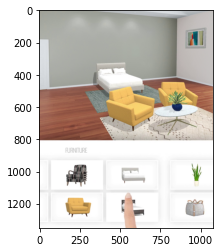

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Colour % in Image
[(0, 29.26207133058985), (3, 14.933196159122087), (2, 39.269547325102884), (1, 16.535185185185185)]

(0.6242982960851279, 0.7910396572451144, 0.562700923513705)
#9fca8f
(0.3106500060758179, 0.6387272188314587, 0.3297532040640487)
#4fa354


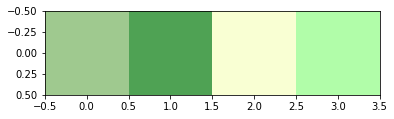

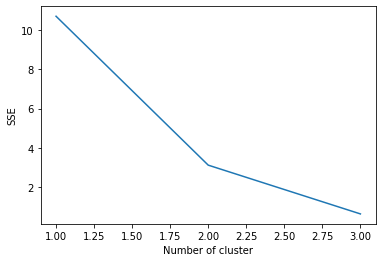

$$$$$$$$$$$$$$$$$$$$$$$


In [197]:
video_path = "/content/drive/MyDrive/Creative_Insights/test_video/Q+T Gamified_Accept_20KUSD_1080x1920_result.mp4"
print('Video Height Width & Aspect Rastio is :')
print(vid_aspect_ratio(video_path))
print()
print("The Length of the video is :",vid_length(video_path),'seconds')
n = 2
vidcap = cv2.VideoCapture(video_path)
total_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
frames_step = total_frames//n

for i in range(n):
    #here, we set the parameter 1 which is the frame number to the frame (i*frames_step)
    vidcap.set(1,i*frames_step)
    success,image = vidcap.read() 
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    prominent_colors_video(image)
    print('$$$$$$$$$$$$$$$$$$$$$$$')
    
vidcap.release()
